In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pylab import mpl
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
color = sns.color_palette()
# sns.set_style('darkgrid')
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [2]:
train_df = pd.read_csv('../data/train.csv', encoding='gbk')
test_df = pd.read_csv('../data/test.csv', encoding='gbk')
train_df.shape

(5642, 42)

In [3]:
# 空值填充分两种，一种是空置太多的直接删除特征，一种是用均值或中值填充
def checknan(df):
    colnan = df.count() / df.shape[0]
    colnan = colnan[colnan < 0.5]
    return list(colnan.index)
def drop_fill(df):
    delcols = checknan(df)
    df.drop(delcols, 1, inplace=True) #删除缺失值多于一半的特征
    df.drop(['体检日期'], 1 ,inplace=True)
    df.fillna(-999, inplace=True)
    return df
def encode_cols(df):
    if isinstance(df['性别'][1],int):
        return 
    else:
        df['性别'] = df['性别'].map({'男': 0, '女': 1, '??': 3})
        return df
    
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
train_df = drop_fill(train_df)
encode_cols(train_df)

#新建特征
train_df['高低胆固醇比例'] = train_df['低密度脂蛋白胆固醇'] / train_df['高密度脂蛋白胆固醇']
train_df['红白细胞比例'] = train_df['白细胞计数'] / train_df['红细胞计数']
train_df.drop(['id'], 1 ,inplace=True)

x = np.array(train_df.drop([ '血糖'], axis=1))
y = np.array(train_df['血糖'])

In [8]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [6]:
def show_scatter(y, y_pred, legend0, legend1, showlenth=10):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(range(showlenth),y[:showlenth], label=legend0)
    ax.scatter(range(showlenth),y_pred[:showlenth],label =legend1)
    plt.legend()
    plt.show()

0:	learn: 5.6784451	total: 106ms	remaining: 1m 45s
1:	learn: 5.5219065	total: 131ms	remaining: 1m 5s
2:	learn: 5.3728283	total: 154ms	remaining: 51.1s
3:	learn: 5.2266369	total: 180ms	remaining: 44.8s
4:	learn: 5.0848056	total: 201ms	remaining: 40.1s
5:	learn: 4.9488138	total: 228ms	remaining: 37.7s
6:	learn: 4.8158765	total: 251ms	remaining: 35.5s
7:	learn: 4.6889402	total: 273ms	remaining: 33.9s
8:	learn: 4.5654772	total: 298ms	remaining: 32.8s
9:	learn: 4.4459421	total: 324ms	remaining: 32s
10:	learn: 4.3297176	total: 346ms	remaining: 31.1s
11:	learn: 4.2174530	total: 374ms	remaining: 30.8s
12:	learn: 4.1088810	total: 400ms	remaining: 30.4s
13:	learn: 4.0034908	total: 423ms	remaining: 29.8s
14:	learn: 3.9013798	total: 443ms	remaining: 29.1s
15:	learn: 3.8030584	total: 468ms	remaining: 28.8s
16:	learn: 3.7085552	total: 498ms	remaining: 28.8s
17:	learn: 3.6171155	total: 521ms	remaining: 28.4s
18:	learn: 3.5291873	total: 544ms	remaining: 28.1s
19:	learn: 3.4437162	total: 571ms	remainin

166:	learn: 1.3326935	total: 4.19s	remaining: 20.9s
167:	learn: 1.3313334	total: 4.21s	remaining: 20.9s
168:	learn: 1.3298629	total: 4.24s	remaining: 20.8s
169:	learn: 1.3293209	total: 4.27s	remaining: 20.8s
170:	learn: 1.3279918	total: 4.29s	remaining: 20.8s
171:	learn: 1.3270942	total: 4.31s	remaining: 20.8s
172:	learn: 1.3251738	total: 4.34s	remaining: 20.7s
173:	learn: 1.3243089	total: 4.36s	remaining: 20.7s
174:	learn: 1.3227583	total: 4.39s	remaining: 20.7s
175:	learn: 1.3216870	total: 4.41s	remaining: 20.7s
176:	learn: 1.3208232	total: 4.43s	remaining: 20.6s
177:	learn: 1.3194091	total: 4.46s	remaining: 20.6s
178:	learn: 1.3183598	total: 4.49s	remaining: 20.6s
179:	learn: 1.3175798	total: 4.51s	remaining: 20.5s
180:	learn: 1.3160735	total: 4.53s	remaining: 20.5s
181:	learn: 1.3155751	total: 4.56s	remaining: 20.5s
182:	learn: 1.3147564	total: 4.58s	remaining: 20.5s
183:	learn: 1.3136507	total: 4.61s	remaining: 20.4s
184:	learn: 1.3128829	total: 4.63s	remaining: 20.4s
185:	learn: 

330:	learn: 1.1877074	total: 8.27s	remaining: 16.7s
331:	learn: 1.1870450	total: 8.29s	remaining: 16.7s
332:	learn: 1.1860613	total: 8.32s	remaining: 16.7s
333:	learn: 1.1848759	total: 8.34s	remaining: 16.6s
334:	learn: 1.1835733	total: 8.37s	remaining: 16.6s
335:	learn: 1.1831685	total: 8.4s	remaining: 16.6s
336:	learn: 1.1819629	total: 8.42s	remaining: 16.6s
337:	learn: 1.1809309	total: 8.45s	remaining: 16.6s
338:	learn: 1.1802823	total: 8.48s	remaining: 16.5s
339:	learn: 1.1798977	total: 8.5s	remaining: 16.5s
340:	learn: 1.1794320	total: 8.53s	remaining: 16.5s
341:	learn: 1.1783420	total: 8.55s	remaining: 16.5s
342:	learn: 1.1773178	total: 8.58s	remaining: 16.4s
343:	learn: 1.1767477	total: 8.61s	remaining: 16.4s
344:	learn: 1.1767312	total: 8.62s	remaining: 16.4s
345:	learn: 1.1759412	total: 8.64s	remaining: 16.3s
346:	learn: 1.1754034	total: 8.67s	remaining: 16.3s
347:	learn: 1.1748359	total: 8.69s	remaining: 16.3s
348:	learn: 1.1744402	total: 8.72s	remaining: 16.3s
349:	learn: 1.

492:	learn: 1.0898223	total: 12.3s	remaining: 12.7s
493:	learn: 1.0892682	total: 12.4s	remaining: 12.7s
494:	learn: 1.0889272	total: 12.4s	remaining: 12.6s
495:	learn: 1.0887247	total: 12.4s	remaining: 12.6s
496:	learn: 1.0880897	total: 12.4s	remaining: 12.6s
497:	learn: 1.0879551	total: 12.5s	remaining: 12.6s
498:	learn: 1.0870379	total: 12.5s	remaining: 12.6s
499:	learn: 1.0866448	total: 12.5s	remaining: 12.5s
500:	learn: 1.0863548	total: 12.6s	remaining: 12.5s
501:	learn: 1.0858425	total: 12.6s	remaining: 12.5s
502:	learn: 1.0852760	total: 12.6s	remaining: 12.5s
503:	learn: 1.0851541	total: 12.7s	remaining: 12.4s
504:	learn: 1.0846416	total: 12.7s	remaining: 12.4s
505:	learn: 1.0840377	total: 12.7s	remaining: 12.4s
506:	learn: 1.0836402	total: 12.7s	remaining: 12.4s
507:	learn: 1.0832233	total: 12.8s	remaining: 12.4s
508:	learn: 1.0827469	total: 12.8s	remaining: 12.3s
509:	learn: 1.0823680	total: 12.8s	remaining: 12.3s
510:	learn: 1.0817546	total: 12.8s	remaining: 12.3s
511:	learn: 

655:	learn: 1.0200546	total: 16.6s	remaining: 8.68s
656:	learn: 1.0198714	total: 16.6s	remaining: 8.66s
657:	learn: 1.0195772	total: 16.6s	remaining: 8.64s
658:	learn: 1.0193556	total: 16.6s	remaining: 8.61s
659:	learn: 1.0189184	total: 16.7s	remaining: 8.59s
660:	learn: 1.0182088	total: 16.7s	remaining: 8.57s
661:	learn: 1.0179157	total: 16.7s	remaining: 8.55s
662:	learn: 1.0177280	total: 16.8s	remaining: 8.52s
663:	learn: 1.0173849	total: 16.8s	remaining: 8.5s
664:	learn: 1.0167744	total: 16.8s	remaining: 8.49s
665:	learn: 1.0164799	total: 16.9s	remaining: 8.46s
666:	learn: 1.0161570	total: 16.9s	remaining: 8.44s
667:	learn: 1.0160330	total: 16.9s	remaining: 8.41s
668:	learn: 1.0153206	total: 17s	remaining: 8.39s
669:	learn: 1.0147719	total: 17s	remaining: 8.36s
670:	learn: 1.0145760	total: 17s	remaining: 8.34s
671:	learn: 1.0143413	total: 17s	remaining: 8.31s
672:	learn: 1.0136058	total: 17.1s	remaining: 8.29s
673:	learn: 1.0134541	total: 17.1s	remaining: 8.26s
674:	learn: 1.0129845

819:	learn: 0.9610113	total: 21s	remaining: 4.6s
820:	learn: 0.9608328	total: 21s	remaining: 4.58s
821:	learn: 0.9606827	total: 21s	remaining: 4.55s
822:	learn: 0.9604811	total: 21.1s	remaining: 4.53s
823:	learn: 0.9602905	total: 21.1s	remaining: 4.5s
824:	learn: 0.9600736	total: 21.1s	remaining: 4.47s
825:	learn: 0.9596076	total: 21.1s	remaining: 4.45s
826:	learn: 0.9592710	total: 21.2s	remaining: 4.42s
827:	learn: 0.9591141	total: 21.2s	remaining: 4.4s
828:	learn: 0.9588340	total: 21.2s	remaining: 4.37s
829:	learn: 0.9584105	total: 21.2s	remaining: 4.35s
830:	learn: 0.9581332	total: 21.3s	remaining: 4.32s
831:	learn: 0.9577109	total: 21.3s	remaining: 4.3s
832:	learn: 0.9574370	total: 21.3s	remaining: 4.27s
833:	learn: 0.9571149	total: 21.3s	remaining: 4.25s
834:	learn: 0.9568295	total: 21.4s	remaining: 4.22s
835:	learn: 0.9565374	total: 21.4s	remaining: 4.2s
836:	learn: 0.9560775	total: 21.4s	remaining: 4.17s
837:	learn: 0.9558361	total: 21.4s	remaining: 4.14s
838:	learn: 0.9556342	t

978:	learn: 0.9193678	total: 25.2s	remaining: 541ms
979:	learn: 0.9190291	total: 25.3s	remaining: 516ms
980:	learn: 0.9183664	total: 25.3s	remaining: 490ms
981:	learn: 0.9183355	total: 25.3s	remaining: 464ms
982:	learn: 0.9182443	total: 25.4s	remaining: 438ms
983:	learn: 0.9181697	total: 25.4s	remaining: 413ms
984:	learn: 0.9181045	total: 25.4s	remaining: 387ms
985:	learn: 0.9177957	total: 25.4s	remaining: 361ms
986:	learn: 0.9174657	total: 25.4s	remaining: 335ms
987:	learn: 0.9171615	total: 25.5s	remaining: 309ms
988:	learn: 0.9169403	total: 25.5s	remaining: 284ms
989:	learn: 0.9168142	total: 25.5s	remaining: 258ms
990:	learn: 0.9167103	total: 25.5s	remaining: 232ms
991:	learn: 0.9165153	total: 25.6s	remaining: 206ms
992:	learn: 0.9163904	total: 25.6s	remaining: 180ms
993:	learn: 0.9163061	total: 25.6s	remaining: 155ms
994:	learn: 0.9160433	total: 25.7s	remaining: 129ms
995:	learn: 0.9157910	total: 25.7s	remaining: 103ms
996:	learn: 0.9157056	total: 25.7s	remaining: 77.4ms
997:	learn:

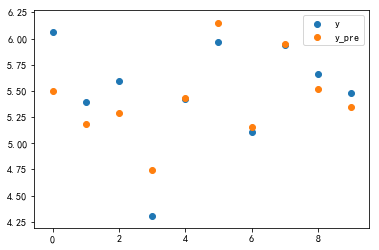

original train score: 0.8372633431378014


In [11]:
# Randomforest 默认参数
model_rf = CatBoostRegressor(random_seed_=100)
model_rf.fit(x, y)
y_pred = model_rf.predict(x)
show_scatter(y, y_pred, 'y', 'y_pre')
print('original train score:',metrics.mean_squared_error(y, y_pred))